# **Statistical Analyst Time Series Using Sunspot Data**
---
pada tahap ini kita akan melakukan preprocesing data lebih lanjut dengan menggunakan statistical analyst 

## **1.Statistical Analyst Using Sunspot Data**

### **1.1 Import Library**
---
pertama kita akan melakukan import library yang dibutuhkan untuk proses analisis statistik pada data sunspot

In [4]:
# Import libraries
import os                           # For file system operations
import numpy as np                  # Numerical computations
import pandas as pd                 # Data manipulation
import matplotlib.pyplot as plt     # Visualization with Matplotlib
import seaborn as sns               # Visualization with Seaborn
from scipy import stats             # Statistical functions
from dateutil.parser import parse   # Parsing dates for time series

# Import statistical and time series analysis tools
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                  # ARIMA model

# Suppress warnings
from warnings import simplefilter
simplefilter('ignore')  # Ignore warnings for cleaner output

# Define a function to parse dates (useful for time series data)
dateparse = lambda dates: parse(dates)

plt.style.use('Solarize_Light2')

### **1.2 Load File CSV dengan library OS dan membaca file tersebut dengan pandas**
---
pada tahap ini kita akan melakukan load file yang sudah diolah sebelum nya pada kode exploration.ipynb dan menggunakan file tersebut untuk analisis lebih lanjut 

In [5]:
# Path ke folder
folder_path = "../data/raw"

# Menelusuri semua file di folder dan subfolder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".csv"):  # Menemukan file CSV
            file_path = os.path.join(root, file)
            print(f"File ditemukan: {file_path}")
            
            # Membaca file ke pandas
            df = pd.read_csv(file_path, parse_dates=['Date'], date_parser=dateparse)
            
            # Menampilkan 5 baris pertama
            print(df.head())


File ditemukan: ../data/raw\Sunspots.csv
   Unnamed: 0       Date  Monthly Mean Total Sunspot Number
0           0 1749-01-31                               96.7
1           1 1749-02-28                              104.3
2           2 1749-03-31                              116.7
3           3 1749-04-30                               92.8
4           4 1749-05-31                              141.7


In [6]:
df = df.drop(columns='Unnamed: 0', axis=True).set_index('Date')
df.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


### **1.3 Sunspots Data**

In [7]:
# Membaca data dari file
dta = df

# Membuat indeks waktu berdasarkan range tahun menggunakan pandas
date_range = pd.date_range(start="1700", end="2008", periods=len(dta))
dta.index = date_range
dta.index.freq = pd.infer_freq(dta.index)

# Menghapus kolom "YEAR" jika ada
if "YEAR" in dta.columns:
    del dta["YEAR"]

### membuat visualisasi untuk plot ACF dan PACF

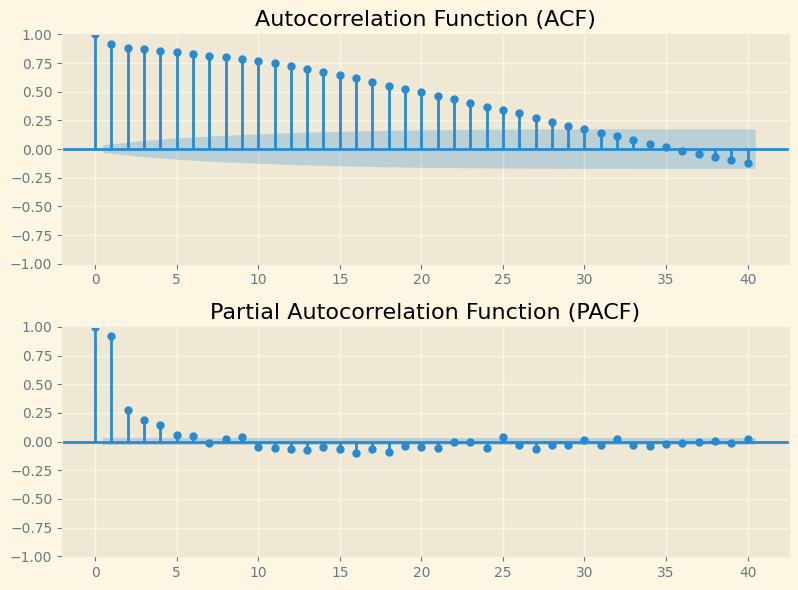

In [8]:
# Membuat plot ACF dan PACF
fig = plt.figure(figsize=(8, 6))

# Plot ACF
ax1 = fig.add_subplot(211)
plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax1.set_title("Autocorrelation Function (ACF)")

# Plot PACF
ax2 = fig.add_subplot(212)
plot_pacf(dta.values.squeeze(), lags=40, ax=ax2)
ax2.set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [9]:
from statsmodels.tsa.arima.model import ARIMA

arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
print(arma_mod20.params) 

const      82.070484
ar.L1       0.667000
ar.L2       0.273224
sigma2    671.166050
dtype: float64


In [10]:
arma_mod30 = ARIMA(dta, order=(3, 0, 0)).fit()

In [11]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

30404.770864851173 30429.118966733844 30413.492952720695


In [12]:
print(arma_mod30.params)

const      82.069181
ar.L1       0.614569
ar.L2       0.145285
ar.L3       0.191831
sigma2    646.169699
dtype: float64


In [13]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

30284.8088506678 30315.24397802114 30295.711460504703


In [14]:
sm.stats.durbin_watson(arma_mod30.resid.values)

2.053501805648196

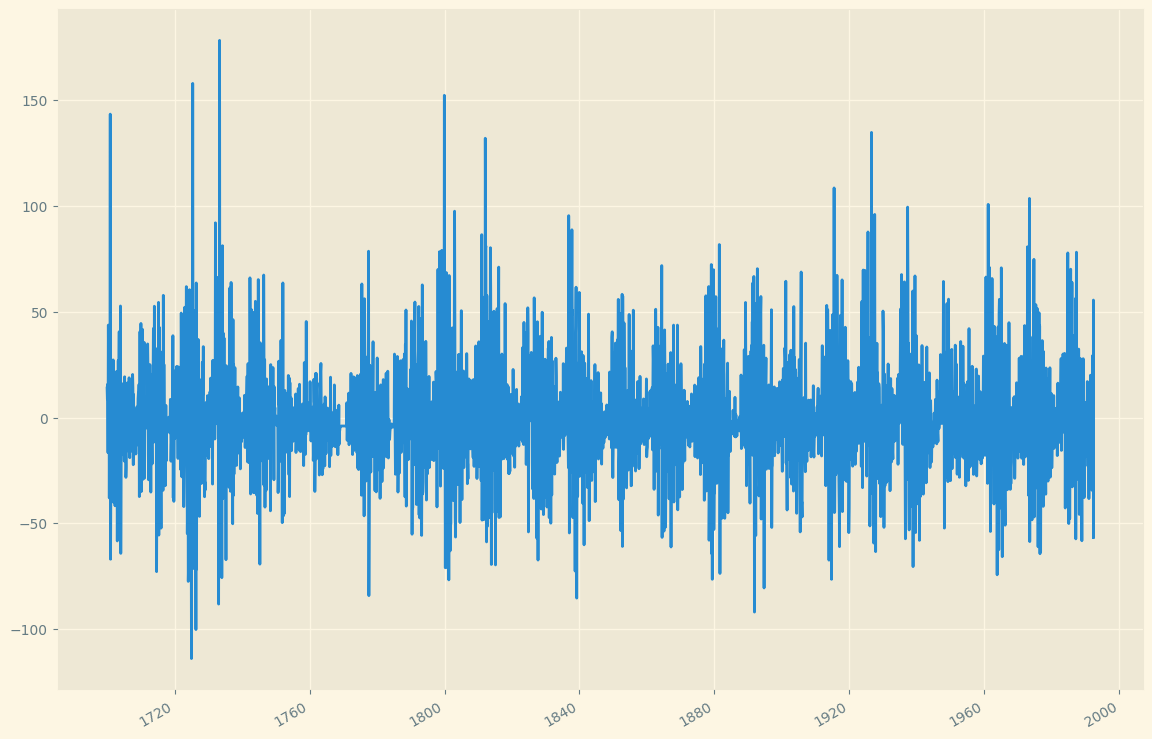

In [15]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax)

In [16]:
resid = arma_mod30.resid

In [17]:
stats.normaltest(resid)

NormaltestResult(statistic=461.74053054436115, pvalue=5.423975969454872e-101)

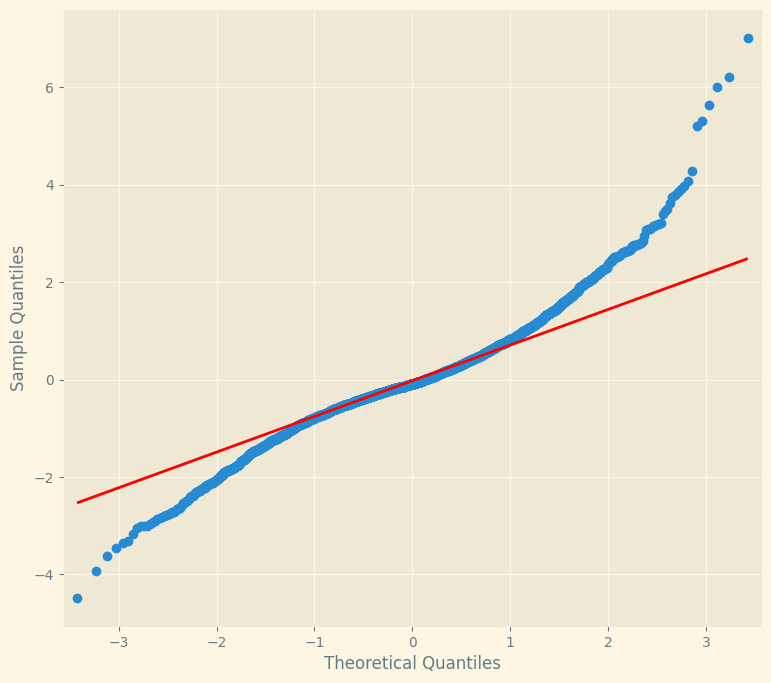

In [20]:
from statsmodels.graphics.gofplots import qqplot

# Membuat plot Q-Q
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111)
qqplot(resid, line="q", ax=ax, fit=True)
plt.show()

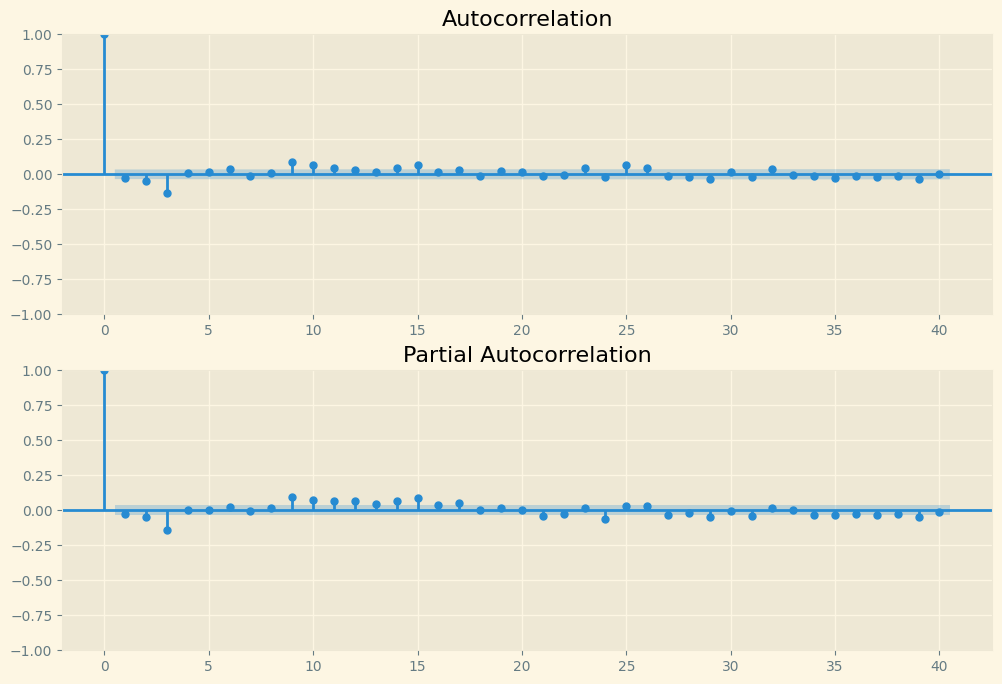

In [21]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [25]:
from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(1234)
# include zero-th lag
arparams = np.array([1, 0.75, -0.65, -0.55, 0.9])
maparams = np.array([1, 0.65])

In [26]:
arma_t = ArmaProcess(arparams, maparams)

In [27]:
arma_t.isinvertible

True

In [28]:
arma_t.isstationary

False

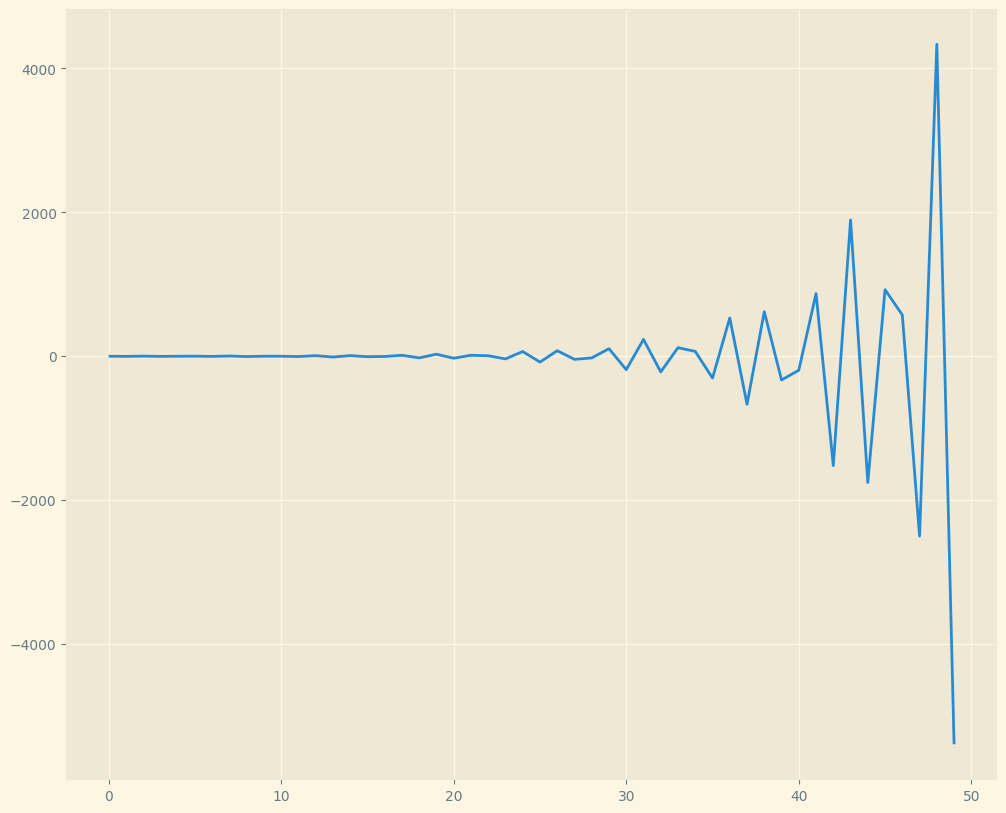

In [29]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.plot(arma_t.generate_sample(nsample=50))

In [30]:
arparams = np.array([1, 0.35, -0.15, 0.55, 0.1])
maparams = np.array([1, 0.65])
arma_t = ArmaProcess(arparams, maparams)
arma_t.isstationary

True

In [31]:
arma_rvs = arma_t.generate_sample(nsample=500, burnin=250, scale=2.5)

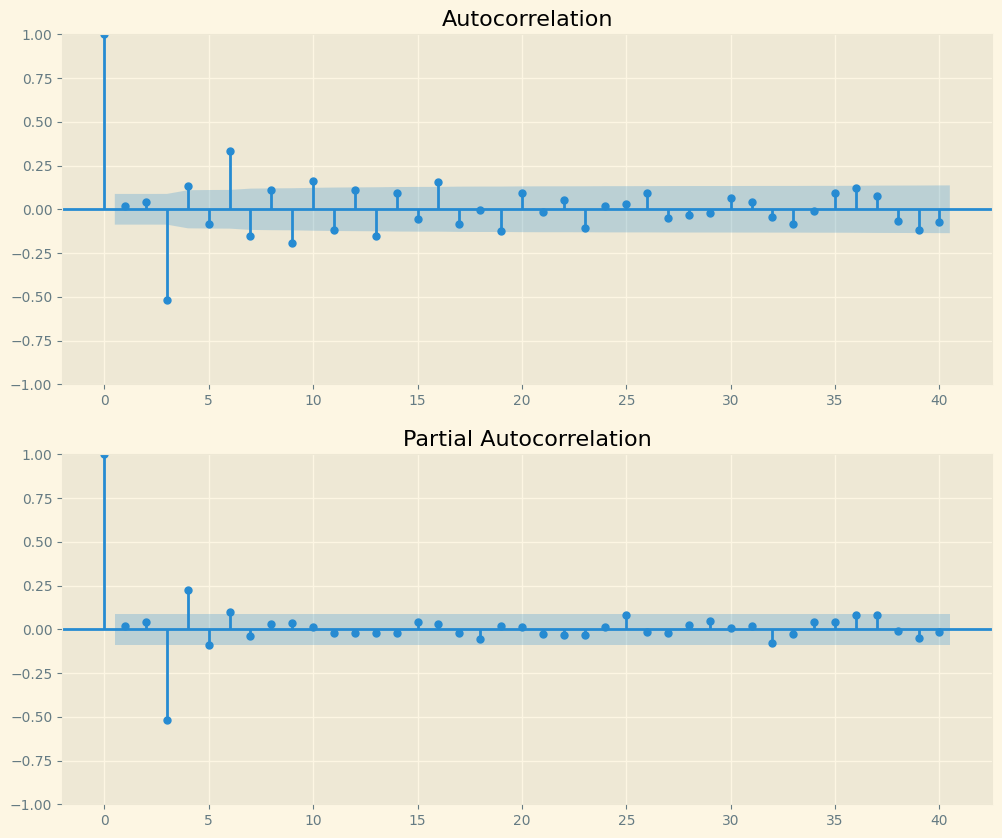

In [32]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_rvs, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_rvs, lags=40, ax=ax2)

In [33]:
lags = int(10 * np.log10(arma_rvs.shape[0]))
arma11 = ARIMA(arma_rvs, order=(1, 0, 1)).fit()
resid = arma11.resid
r, q, p = sm.tsa.acf(resid, nlags=lags, fft=True, qstat=True)
data = np.c_[range(1, lags + 1), r[1:], q, p]
table = pd.DataFrame(data, columns=["lag", "AC", "Q", "Prob(>Q)"])
print(table.set_index("lag"))

            AC           Q      Prob(>Q)
lag                                     
1.0  -0.001244    0.000778  9.777436e-01
2.0   0.052350    1.382049  5.010626e-01
3.0  -0.522181  139.090106  5.938064e-30
4.0   0.146506  149.951983  2.084573e-31
5.0  -0.091171  154.166872  1.731083e-31
6.0   0.337059  211.891306  5.568290e-43
7.0  -0.160920  225.075262  5.519054e-45
8.0   0.116132  231.955610  1.142179e-45
9.0  -0.195352  251.464207  4.895753e-49
10.0  0.166410  265.649428  2.760836e-51
11.0 -0.126465  273.858717  2.767679e-52
12.0  0.115015  280.662675  5.334652e-53
13.0 -0.159302  293.742050  4.899046e-55
14.0  0.095846  298.486519  2.444596e-55
15.0 -0.062853  300.531001  4.335557e-55
16.0  0.159244  313.681886  3.718133e-57
17.0 -0.089423  317.837388  2.317190e-57
18.0  0.002504  317.840655  1.018533e-56
19.0 -0.124735  325.959706  9.297882e-58
20.0  0.093960  330.576238  4.414194e-58
21.0 -0.016212  330.713970  1.708363e-57
22.0  0.054804  332.291098  3.279536e-57
23.0 -0.110592  

In [34]:
arma41 = ARIMA(arma_rvs, order=(4, 0, 1)).fit()
resid = arma41.resid
r, q, p = sm.tsa.acf(resid, nlags=lags, fft=True, qstat=True)
data = np.c_[range(1, lags + 1), r[1:], q, p]
table = pd.DataFrame(data, columns=["lag", "AC", "Q", "Prob(>Q)"])
print(table.set_index("lag"))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.007899   0.031383  0.859389
2.0   0.004128   0.039972  0.980212
3.0   0.018095   0.205341  0.976722
4.0  -0.006766   0.228509  0.993949
5.0   0.018123   0.395044  0.995465
6.0   0.050690   1.700565  0.945078
7.0   0.010253   1.754087  0.972191
8.0  -0.011208   1.818176  0.986088
9.0   0.020292   2.028663  0.991006
10.0  0.001028   2.029204  0.996111
11.0 -0.014033   2.130285  0.997983
12.0 -0.023858   2.423052  0.998426
13.0 -0.002108   2.425342  0.999339
14.0 -0.018784   2.607562  0.999589
15.0  0.011317   2.673844  0.999805
16.0  0.042158   3.595554  0.999443
17.0  0.007943   3.628344  0.999734
18.0 -0.074312   6.504019  0.993685
19.0 -0.023378   6.789205  0.995255
20.0  0.002398   6.792213  0.997313
21.0  0.000488   6.792338  0.998515
22.0  0.017953   6.961578  0.999024
23.0 -0.038576   7.744617  0.998744
24.0 -0.029817   8.213410  0.998859
25.0  0.077850  11.415980  0.990674
26.0  0.040407  12.280577  0

In [35]:
macrodta = sm.datasets.macrodata.load_pandas().data
macrodta.index = pd.Index(sm.tsa.datetools.dates_from_range("1959Q1", "2009Q3"))
cpi = macrodta["cpi"]

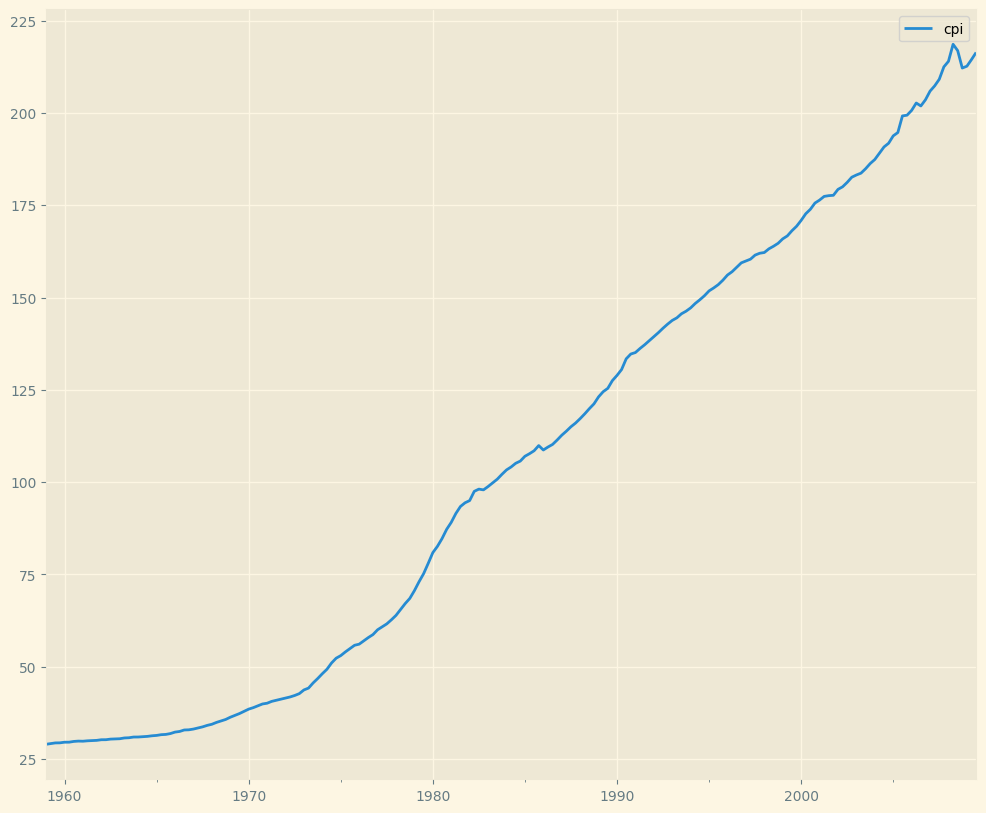

In [37]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax = cpi.plot(ax=ax)
ax.legend()

In [38]:
print(sm.tsa.adfuller(cpi)[1])

0.9904328188337421


### **Artificial Data**

In [39]:
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample

np.random.seed(12345)

arparams = np.array([0.75, -0.25])
maparams = np.array([0.65, 0.35])

arparams = np.r_[1, -arparams]
maparams = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)

In [40]:
dates = pd.date_range("1980-1-1", freq="M", periods=nobs)
y = pd.Series(y, index=dates)
arma_mod = ARIMA(y, order=(2, 0, 2), trend="n")
arma_res = arma_mod.fit()

In [41]:
print(arma_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -353.445
Date:                Tue, 10 Dec 2024   AIC                            716.891
Time:                        16:17:14   BIC                            734.498
Sample:                    01-31-1980   HQIC                           723.977
                         - 10-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7905      0.142      5.566      0.000       0.512       1.069
ar.L2         -0.2314      0.124     -1.859      0.063      -0.475       0.013
ma.L1          0.7007      0.131      5.344      0.0

In [42]:
y.tail()

2000-06-30    0.173211
2000-07-31   -0.048325
2000-08-31   -0.415804
2000-09-30    0.338725
2000-10-31    0.360838
Freq: ME, dtype: float64

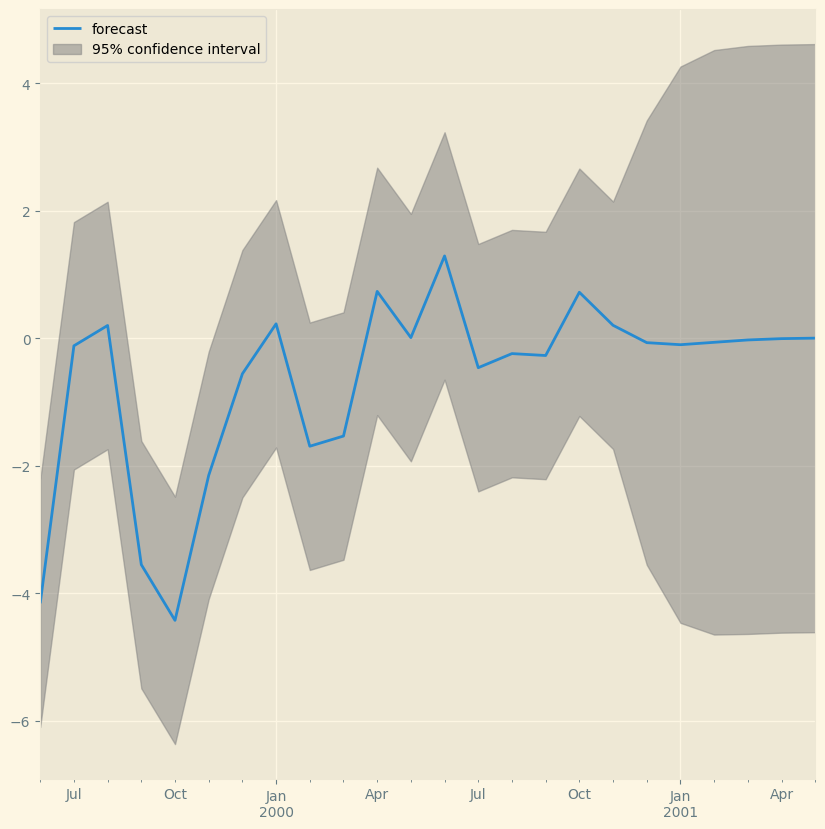

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
fig = plot_predict(arma_res, start="1999-06-30", end="2001-05-31", ax=ax)
legend = ax.legend(loc="upper left")